In [142]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.special import lambertw
import astropy.units as u
save = False
plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':10})

In [143]:
# Parameters
numslices = 10
N = 128
srcplane = 63
boxsize = 4.537091005222111 # kpc
dr = boxsize / N

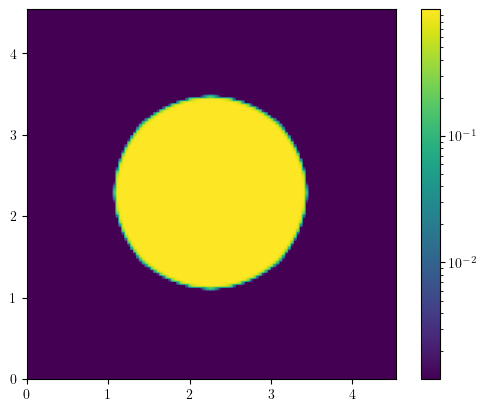

In [144]:
with open(files_coarse[1],"rb") as f:
    xtest = pkl.load(f)
plt.imshow(xtest[:,:,srcplane],norm='log',extent=(0,4.537,0,4.537))
plt.colorbar()

In [177]:
# Load Files
files_coarse = sorted(glob.glob("./results_coarse/xfrac*.pkl"))
files_fine = [] #sorted(glob.glob("./results_fine/xfrac*.pkl"))
for k in range(76):
    files_fine.append(f"./results_fine/xfrac_{k:n}.pkl")
print(files_fine)

['./results_fine/xfrac_0.pkl', './results_fine/xfrac_1.pkl', './results_fine/xfrac_2.pkl', './results_fine/xfrac_3.pkl', './results_fine/xfrac_4.pkl', './results_fine/xfrac_5.pkl', './results_fine/xfrac_6.pkl', './results_fine/xfrac_7.pkl', './results_fine/xfrac_8.pkl', './results_fine/xfrac_9.pkl', './results_fine/xfrac_10.pkl', './results_fine/xfrac_11.pkl', './results_fine/xfrac_12.pkl', './results_fine/xfrac_13.pkl', './results_fine/xfrac_14.pkl', './results_fine/xfrac_15.pkl', './results_fine/xfrac_16.pkl', './results_fine/xfrac_17.pkl', './results_fine/xfrac_18.pkl', './results_fine/xfrac_19.pkl', './results_fine/xfrac_20.pkl', './results_fine/xfrac_21.pkl', './results_fine/xfrac_22.pkl', './results_fine/xfrac_23.pkl', './results_fine/xfrac_24.pkl', './results_fine/xfrac_25.pkl', './results_fine/xfrac_26.pkl', './results_fine/xfrac_27.pkl', './results_fine/xfrac_28.pkl', './results_fine/xfrac_29.pkl', './results_fine/xfrac_30.pkl', './results_fine/xfrac_31.pkl', './results_fine/x

In [178]:
files_coarse = [
    './results_coarse/xfrac_0.000.pkl',
    './results_coarse/xfrac_1.000.pkl',
    './results_coarse/xfrac_2.000.pkl',
    './results_coarse/xfrac_3.000.pkl',
    './results_coarse/xfrac_4.000.pkl',
    './results_coarse/xfrac_5.000.pkl',
    './results_coarse/xfrac_6.000.pkl',
    './results_coarse/xfrac_7.000.pkl',
    './results_coarse/xfrac_8.000.pkl',
    './results_coarse/xfrac_9.000.pkl',
    './results_coarse/xfrac_10.000.pkl'
]

In [179]:
slices_coarse = np.empty((len(files_coarse),int(N/2)+1))
for i,fn in enumerate(files_coarse):
    with open(fn,"rb") as f:
        slices_coarse[i] = pkl.load(f)[srcplane:,srcplane,srcplane]
slices_fine = np.empty((len(files_fine),int(N/2)+1))
for i,fn in enumerate(files_fine):
    with open(fn,"rb") as f:
        slices_fine[i] = pkl.load(f)[srcplane:,srcplane,srcplane]

In [180]:
# Analytical Solution
kpc = 3.086e21
year = 3.15576E+07
Ngamma = 1e51
nH = 1.87e-4
alpha_B = 2.59e-13
r0 = 5*u.kpc.to('cm')
nH0 = 0.015

kpc_in_km = 3.0857e16 # km
myr_in_s = 31557600000000 # s

t_rec = 1.0 / (alpha_B*nH0*year*1e6)
r_S = ((Ngamma*t_rec*u.Myr.to('s'))/(4*np.pi*nH0*r0**2))*u.cm.to('kpc')

print("r_S = ",r_S," kpc")
print("t_rec = ",t_rec," Myr")
def r_I(t):
    #return r_S * (1.0 - np.exp(-t/t_rec))**(1./3)
    return r_S * (1+lambertw(-np.exp(-((r0*u.cm.to('kpc')*t)/(r_S*t_rec))-1)).real)
def v_I(t):
    return kpc_in_km/myr_in_s * r_S/(3*t_rec) * (np.exp(-t/t_rec))/(1.0 - np.exp(-t/t_rec))**(2./3)

r_S =  1.859157613509176  kpc
t_rec =  8.156521959853013  Myr


In [181]:
tt = np.linspace(0,15,200,endpoint=True)
tt_ = np.linspace(0,15,11,endpoint=True)
tt_fine = np.linspace(0,15,101,endpoint=True)
r_analytical = r_I(tt)
v_analytical = v_I(tt[1:])

In [182]:
x = np.linspace(0,boxsize/2,int(N/2)+1)

In [183]:
# Find position of ionization front by interpolation
# flip() is used because np.interp works on monotonically increasing functions only
front_pos_coarse = np.empty(11)
front_pos_fine = np.empty(len(files_fine))
for k in range(11):
    front_pos_coarse[k] = np.interp(0.5,np.flip(slices_coarse[k]),np.flip(x))
for k in range(len(files_fine)):
    front_pos_fine[k] = np.interp(0.5,np.flip(slices_fine[k]),np.flip(x))

In [184]:
front_pos_fine

array([0.        , 0.50853031, 0.69068393, 0.82377773, 0.92457738,
       1.00889505, 1.08021185, 1.14483784, 1.19324969, 1.24782521,
       1.29116707, 1.32877152, 1.36422816, 1.39834671, 1.43026185,
       1.45702684, 1.47788283, 1.50544836, 1.52872348, 1.54483719,
       1.56930384, 1.58139671, 1.60376032, 1.6144278 , 1.63063724,
       1.64605352, 1.65421276, 1.6718606 , 1.68209987, 1.68863679,
       1.70204265, 1.7141733 , 1.71947043, 1.72529622, 1.7362046 ,
       1.74729914, 1.75279344, 1.75641479, 1.76134064, 1.76929043,
       1.77920577, 1.78493428, 1.78844987, 1.79098785, 1.79395816,
       1.79796914, 1.80358346, 1.81102354, 1.81636654, 1.81996713,
       1.82251861, 1.82437811, 1.8259053 , 1.82753261, 1.82944535,
       1.83172237, 1.83445149, 1.83775264, 1.84179106, 1.84610363,
       1.84939136, 1.85193081, 1.85393673, 1.85554892, 1.85686191,
       1.85794162, 1.85883659, 1.85958889, 1.86024521, 1.86085724,
       1.86146745, 1.86210068, 1.86276836, 1.86347537, 1.86422

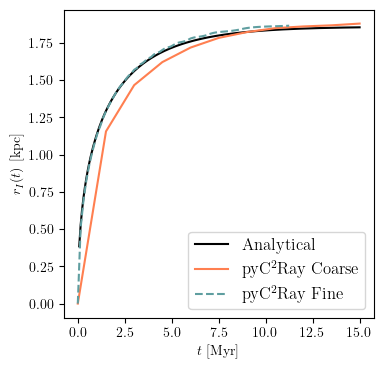

In [186]:
fig3, ax3 = plt.subplots(figsize=(4,4))
offset = 7
ax3.plot(tt,r_analytical,color='black',label="Analytical")
#ax3.plot(tt_,front_pos + offset,'o',label="pyc2ray (+ constant offset)",color='orangered')
ax3.plot(tt_,front_pos_coarse,'-',ms=5,label="pyC$^2$Ray Coarse",color='coral')
ax3.plot(tt_fine[0:76],front_pos_fine,'--',ms=5,label="pyC$^2$Ray Fine",color='cadetblue')
ax3.set_xlabel("$t$ [Myr]")
ax3.set_ylabel("$r_I(t)$ [kpc]")
ax3.legend(fontsize=12)
if save: fig3.savefig("time_plot.png",dpi=300,bbox_inches='tight')

In [54]:
# convert to km/s

#front_vel_coarse = kpc_in_km/myr_in_s * np.diff(front_pos_coarse) / np.diff(tt_)
#front_vel_fine = np.diff(front_pos_fine) / np.diff(tt_fine)
t_ave = []
t_ave_fine = []
front_vel_fine = []
front_vel_coarse = []
for k in range(1,len(tt_)):
    j = 1
    while (front_pos_coarse[k]-front_pos_coarse[k-j]) < dr:
        j+=1
    front_vel_coarse.append(kpc_in_km/myr_in_s * (front_pos_coarse[k]-front_pos_coarse[k-j]) / (tt_[k]-tt_[k-j]))
    tavei = (tt_[k]+tt_[k-j])/2
    t_ave.append(tavei)
for k in range(1,len(tt_fine)):
    j = 1
    while (front_pos_fine[k]-front_pos_fine[k-j]) < dr:
        j+=1
    front_vel_fine.append(kpc_in_km/myr_in_s * (front_pos_fine[k]-front_pos_fine[k-j]) / (tt_fine[k]-tt_fine[k-j]))
    #tavei = (tt_fine[k]+tt_fine[k-1])/2
    tavei = (tt_fine[k]+tt_fine[k-j])/2
    t_ave_fine.append(tavei)

NameError: name 'front_pos_fine' is not defined

In [ ]:
fig4, ax4 = plt.subplots(figsize=(4,4))
offset = 7
ax4.semilogy(tt[1:],v_analytical,color='black',label="Analytical")
ax4.semilogy(t_ave,front_vel_coarse,'o',label="pyC$^2$Ray Coarse",color='coral')
ax4.set_xlabel("$t$ [Myr]")
ax4.set_ylabel("$v_I(t)$ [kpc]")
ax4.legend()
if save: fig4.savefig("time_plot_vel.png",dpi=300,bbox_inches='tight')

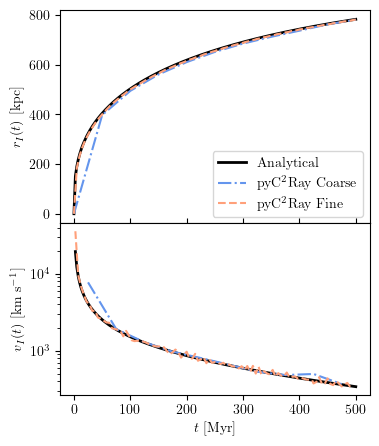

In [22]:
fig, ax = plt.subplots(2,1,figsize=(4,5),sharex=True,height_ratios=[5,4])
ax[0].plot(tt,r_analytical,color='black',label="Analytical",lw=2)
ax[0].plot(tt_,front_pos_coarse,'-.',label="pyC$^2$Ray Coarse",color='cornflowerblue')
ax[0].plot(tt_fine,front_pos_fine,'--',ms=6,label="pyC$^2$Ray Fine",color='lightsalmon')


#ax[0].set_xlabel("$t$ [Myr]")
ax[0].set_ylabel("$r_I(t)$ [kpc]")
ax[0].legend()

ax[1].semilogy(tt[1:],v_analytical,color='black',label="Analytical",lw=2)
ax[1].semilogy(t_ave,front_vel_coarse,'-.',label="pyC$^2$Ray Coarse",color='cornflowerblue')
ax[1].semilogy(t_ave_fine,front_vel_fine,'--',label="pyC$^2$Ray Fine",color='lightsalmon')

#ax[1].semilogy(tt_,front_vel_coarse,'^',label="pyC$^2$Ray Coarse",color='teal')

ax[1].set_xlabel("$t$ [Myr]")
ax[1].set_ylabel("$v_I(t)$ [km s$^{-1}$]")
ax[1].tick_params(top=True)
#ax[1].legend()
fig.subplots_adjust(hspace=0)

In [23]:
fig.savefig('test1.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
